# SVM classification of the Cats dataset
In this notebook we'll see how the different SVM classifiers predict if a cat is a male or a female depending on its body weight and heart weight.

### Variables:

Sex: Gender of the cat (F: Female or M: Male)

Bwt: Body weight

Hwt: Heart weight

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [2]:
df = pd.read_csv('cats.csv')

## Data Exploration

In [3]:
df.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [4]:
df.describe()

,Unnamed: 0,Bwt,Hwt
count,144.000000,144.000000,144.000000
mean,72.500000,2.723611,10.630556
std,41.713307,0.485307,2.434636
min,1.000000,2.000000,6.300000
25%,36.750000,2.300000,8.950000
50%,72.500000,2.700000,10.100000
75%,108.250000,3.025000,12.125000
max,144.000000,3.900000,20.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  144 non-null    int64  
 1   Sex         144 non-null    object 
 2   Bwt         144 non-null    float64
 3   Hwt         144 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


There are no missing values and no NaN

## Data Visualization

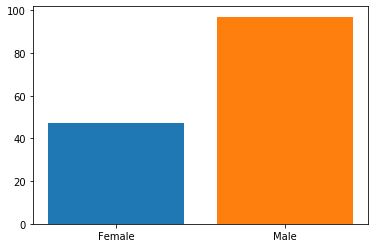

In [6]:
plt.bar(x=0, height=df.loc[df.Sex == 'F'].count())
plt.bar(x=1, height=df.loc[df.Sex == 'M'].count())
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

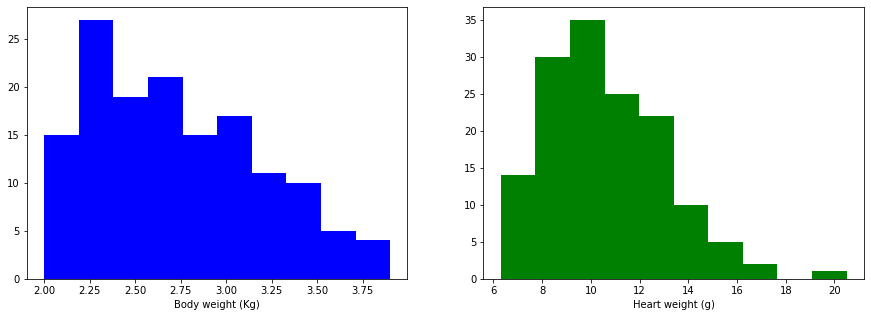

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1, xlabel="Body weight (Kg)")
plt.hist(df.Bwt, color='b')
plt.subplot(1,2,2, xlabel="Heart weight (g)")
plt.hist(df.Hwt, color='g')

plt.show()

## Replace categorical to numerical variables

In [8]:
df.Sex.replace({'M':'0', 'F':'1'}, inplace=True)
df.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,1,2.0,7.0
1,2,1,2.0,7.4
2,3,1,2.0,9.5
3,4,1,2.1,7.2
4,5,1,2.1,7.3


## Select dependent and independent variables

In [9]:
X = df.iloc[:, [2,3]]
y = df.loc[:, "Sex"]

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=31)
#stratify changes the performance a bit

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Train Model

In [12]:
from sklearn import svm

#Values chosen after hyperparameter tuning which is done below
C = 1 #Regularization parameter
gamma = 1

svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train) 
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X_train, y_train) 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train) 
lin_svc = svm.LinearSVC(C=C, max_iter=1000000).fit(X_train, y_train)

## Evaluate Model

In [13]:
# Titles for the plots
titles = ['SVM (Linear kernel)',  
          'Linear SVM',  
          'SVM (RBF kernel)',  
          'SVM (Polynomial kernel)[degree=3]']

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    y_pred = clf.predict(X_test)
    
    print(titles[i], ':')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('F1 score: ', f1_score(y_test, y_pred, average="binary", pos_label='1'))
    print('-------------------------------')

SVM (Linear kernel) :
Accuracy:  0.7916666666666666
F1 score:  0.6875
-------------------------------
Linear SVM :
Accuracy:  0.7916666666666666
F1 score:  0.6666666666666667
-------------------------------
SVM (RBF kernel) :
Accuracy:  0.7916666666666666
F1 score:  0.6875
-------------------------------
SVM (Polynomial kernel)[degree=3] :
Accuracy:  0.75
F1 score:  0.5
-------------------------------


## Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# defining parameter range 
param_grid = {     'C': [0.1, 1, 10, 100, 1000], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf', 'poly']} 

grid = GridSearchCV(SVC(), param_grid) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.73      0.65      0.69        17

    accuracy                           0.79        48
   macro avg       0.78      0.76      0.77        48
weighted avg       0.79      0.79      0.79        48



## Visualize the model performance

In [16]:
# Step size for the mesh
h = .02

In [17]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

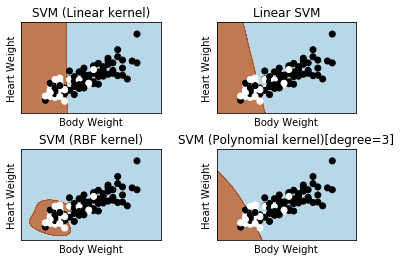

In [18]:
# Establish the boundaries for the plot frontiers
for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):  
    plt.subplot(2, 2, i + 1)  
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 

    #Predict with the mesh points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Colour the plots
    Z = Z.reshape(xx.shape)  
    plt.contourf(xx, yy, Z,
                 cmap=plt.cm.Paired, 
                 alpha=0.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

    plt.xlabel('Body Weight')  
    plt.ylabel('Heart Weight')

    plt.xlim(xx.min(), xx.max())  
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())  
    plt.yticks(())  

    plt.title(titles[i])  

plt.show()